In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pprint
import json
import requests
import http.client
from api_byron import api_key 
url = 'https://api-formula-1.p.rapidapi.com/rankings/startinggrid'

querystring = {"race":"78"}

headers= {
	"X-RapidAPI-Key": api_key, 
	"X-RapidAPI-Host": "api-formula-1.p.rapidapi.com"
}

response = requests.get(url, headers = headers, params=querystring)
data=response.json()["response"]
len(data)
print(response.json())
driver = []
driver_id = []
starting_position = []
for ind in range(len(data)):
    driver.append(data[ind]['driver']['name'])
    driver_id.append(data[ind]['driver']['id'])
    starting_position.append(data[ind]['position'])
driver_info = {"Driver": driver,
               "Driver_ID": driver_id,
               "Position_Starting":starting_position}
driver_df = pd.DataFrame(driver_info)
driver_df





ModuleNotFoundError: No module named 'api_byron'

In [38]:
response_sg = requests.get(url, headers = headers ,params=querystring)
print(response_sg.json())
print(json.dumps(response_sg.json(), indent=4, sort_keys=True))
sg = response_sg.json()['response']
len(sg)

{'get': 'rankings', 'parameters': {'race': '78'}, 'errors': [], 'results': 20, 'response': [{'race': {'id': 78}, 'driver': {'id': 5, 'name': 'Valtteri Bottas', 'abbr': 'BOT', 'number': 77, 'image': 'https://media-4.api-sports.io/formula-1/drivers/5.png'}, 'team': {'id': 5, 'name': 'Mercedes-AMG Petronas', 'logo': 'https://media-4.api-sports.io/formula-1/teams/5.png'}, 'position': 1, 'time': '1:28.769'}, {'race': {'id': 78}, 'driver': {'id': 20, 'name': 'Lewis Hamilton', 'abbr': 'HAM', 'number': 44, 'image': 'https://media-4.api-sports.io/formula-1/drivers/20.png'}, 'team': {'id': 5, 'name': 'Mercedes-AMG Petronas', 'logo': 'https://media-4.api-sports.io/formula-1/teams/5.png'}, 'position': 2, 'time': '1:28.792'}, {'race': {'id': 78}, 'driver': {'id': 19, 'name': 'Sebastian Vettel', 'abbr': 'VET', 'number': 5, 'image': 'https://media-4.api-sports.io/formula-1/drivers/19.png'}, 'team': {'id': 3, 'name': 'Scuderia Ferrari', 'logo': 'https://media-4.api-sports.io/formula-1/teams/3.png'}, '

20

In [39]:
import requests
url1 = "https://api-formula-1.p.rapidapi.com/rankings/races"
querystring = {"race":"78"}
headers = {
	"X-RapidAPI-Key": "e08781089dmsh16e313a85dc9eaep1760dejsn97ec25160526",
	"X-RapidAPI-Host": "api-formula-1.p.rapidapi.com"
}
response = requests.get(url1, headers=headers, params=querystring)
print(response.json())
print(json.dumps(response.json(), indent=4, sort_keys=True))

{'get': 'rankings', 'parameters': {'race': '78'}, 'errors': [], 'results': 20, 'response': [{'race': {'id': 78}, 'driver': {'id': 19, 'name': 'Sebastian Vettel', 'abbr': 'VET', 'number': 5, 'image': 'https://media-4.api-sports.io/formula-1/drivers/19.png'}, 'team': {'id': 3, 'name': 'Scuderia Ferrari', 'logo': 'https://media-4.api-sports.io/formula-1/teams/3.png'}, 'position': 1, 'time': '1:33:53.374', 'laps': 57, 'grid': '3', 'pits': 2, 'gap': None}, {'race': {'id': 78}, 'driver': {'id': 20, 'name': 'Lewis Hamilton', 'abbr': 'HAM', 'number': 44, 'image': 'https://media-4.api-sports.io/formula-1/drivers/20.png'}, 'team': {'id': 5, 'name': 'Mercedes-AMG Petronas', 'logo': 'https://media-4.api-sports.io/formula-1/teams/5.png'}, 'position': 2, 'time': '+6.660', 'laps': 57, 'grid': '2', 'pits': 2, 'gap': None}, {'race': {'id': 78}, 'driver': {'id': 5, 'name': 'Valtteri Bottas', 'abbr': 'BOT', 'number': 77, 'image': 'https://media-4.api-sports.io/formula-1/drivers/5.png'}, 'team': {'id': 5,

In [40]:
position_f= response.json()['response']
len(position_f)

20

In [41]:
driver=[]
position_finished=[]
for ind in range(len(position_f)):
    driver.append(position_f[ind]['driver']['name'])
    position_finished.append(position_f[ind]['position'])

In [42]:
starting_grid_info = {"Driver": driver,
                      "position_finished": position_finished}

In [43]:
starting_grid_df = pd.DataFrame(starting_grid_info)
starting_grid_df

,Driver,position_finished
0,Sebastian Vettel,1
1,Lewis Hamilton,2
2,Valtteri Bottas,3
3,Kimi Raikkonen,4
4,Daniel Ricciardo,5
5,Felipe Massa,6
6,Sergio Perez,7
7,Romain Grosjean,8
8,Nico Hulkenberg,9
9,Esteban Ocon,10


In [44]:
race_df = pd.merge(driver_df, starting_grid_df, how='left', on='Driver')
race_df

,Driver,Driver_ID,Position_Starting,position_finished
0,Valtteri Bottas,5,1,3
1,Lewis Hamilton,20,2,2
2,Sebastian Vettel,19,3,1
3,Daniel Ricciardo,14,4,5
4,Kimi Raikkonen,7,5,4
5,Max Verstappen,25,6,0
6,Nico Hulkenberg,6,7,9
7,Felipe Massa,22,8,6
8,Romain Grosjean,16,9,8
9,Jolyon Palmer,32,10,13


In [45]:
import requests

url = "https://api-formula-1.p.rapidapi.com/pitstops"

querystring = {"race":"78"}

headers = {
	"X-RapidAPI-Key": "e08781089dmsh16e313a85dc9eaep1760dejsn97ec25160526",
	"X-RapidAPI-Host": "api-formula-1.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())
print(json.dumps(response.json(), indent=4, sort_keys=True))

{'get': 'pitstops', 'parameters': {'race': '78'}, 'errors': [], 'results': 31, 'response': [{'race': {'id': 78}, 'driver': {'id': 31, 'name': 'Lance Stroll', 'abbr': 'STR', 'number': 18, 'image': 'https://media-4.api-sports.io/formula-1/drivers/31.png'}, 'team': {'id': 12, 'name': 'Williams F1 Team', 'logo': 'https://media-4.api-sports.io/formula-1/teams/12.png'}, 'stops': 1, 'lap': 8, 'time': '24.915', 'total_time': '24.915'}, {'race': {'id': 78}, 'driver': {'id': 19, 'name': 'Sebastian Vettel', 'abbr': 'VET', 'number': 5, 'image': 'https://media-4.api-sports.io/formula-1/drivers/19.png'}, 'team': {'id': 3, 'name': 'Scuderia Ferrari', 'logo': 'https://media-4.api-sports.io/formula-1/teams/3.png'}, 'stops': 1, 'lap': 10, 'time': '24.702', 'total_time': '24.702'}, {'race': {'id': 78}, 'driver': {'id': 25, 'name': 'Max Verstappen', 'abbr': 'VER', 'number': 1, 'image': 'https://media-4.api-sports.io/formula-1/drivers/25.png'}, 'team': {'id': 1, 'name': 'Red Bull Racing', 'logo': 'https://

In [46]:
pitstops=response.json()["response"]
len(pitstops)

31

In [47]:
num_of_stops = []
total_time = []
driver_pistops = []
for ind in range(len(pitstops)):
    driver_pistops.append(pitstops[ind]['driver']['name'])
    num_of_stops.append(pitstops[ind]['stops'])
    total_time.append(pitstops[ind]['total_time'])

In [48]:
pitstop_info = {"Driver": driver_pistops,
                "Number_of_Stops": num_of_stops,
                "Total_Time_in_Pits": total_time}

In [49]:
pitstop_df = pd.DataFrame(pitstop_info) 

In [50]:
race_df = pd.merge(race_df, pitstop_df, how='left')
race_df

,Driver,Driver_ID,Position_Starting,position_finished,Number_of_Stops,Total_Time_in_Pits
0,Valtteri Bottas,5,1,3,1.0,28.368
1,Valtteri Bottas,5,1,3,2.0,52.908
2,Lewis Hamilton,20,2,2,1.0,30.687
3,Lewis Hamilton,20,2,2,2.0,1:01.369
4,Sebastian Vettel,19,3,1,1.0,24.702
5,Sebastian Vettel,19,3,1,2.0,49.016
6,Daniel Ricciardo,14,4,5,1.0,25.312
7,Daniel Ricciardo,14,4,5,2.0,50.512
8,Kimi Raikkonen,7,5,4,1.0,26.430
9,Kimi Raikkonen,7,5,4,2.0,52.286


In [51]:
rows_to_remove = [0,2,4,6,8,11,13,15,17,19,23,25,28,29,32]
race_df = race_df.drop(rows_to_remove)
race_df

,Driver,Driver_ID,Position_Starting,position_finished,Number_of_Stops,Total_Time_in_Pits
1,Valtteri Bottas,5,1,3,2.0,52.908
3,Lewis Hamilton,20,2,2,2.0,1:01.369
5,Sebastian Vettel,19,3,1,2.0,49.016
7,Daniel Ricciardo,14,4,5,2.0,50.512
9,Kimi Raikkonen,7,5,4,2.0,52.286
10,Max Verstappen,25,6,0,1.0,25.174
12,Nico Hulkenberg,6,7,9,2.0,51.769
14,Felipe Massa,22,8,6,2.0,49.944
16,Romain Grosjean,16,9,8,2.0,50.040
18,Jolyon Palmer,32,10,13,2.0,53.886


In [52]:
sorted_pit_times = race_df.sort_values(by= 'Total_Time_in_Pits')
sorted_pit_times 

,Driver,Driver_ID,Position_Starting,position_finished,Number_of_Stops,Total_Time_in_Pits
3,Lewis Hamilton,20,2,2,2.0,1:01.369
21,Lance Stroll,31,12,0,1.0,24.915
27,Carlos Sainz Jr,24,16,0,1.0,25.001
10,Max Verstappen,25,6,0,1.0,25.174
31,Marcus Ericsson,18,19,0,1.0,25.576
22,Pascal Wehrlein,33,13,11,1.0,26.542
30,Sergio Perez,10,18,7,2.0,48.962
5,Sebastian Vettel,19,3,1,2.0,49.016
24,Esteban Ocon,28,14,10,2.0,49.169
26,Fernando Alonso,4,15,0,2.0,49.645


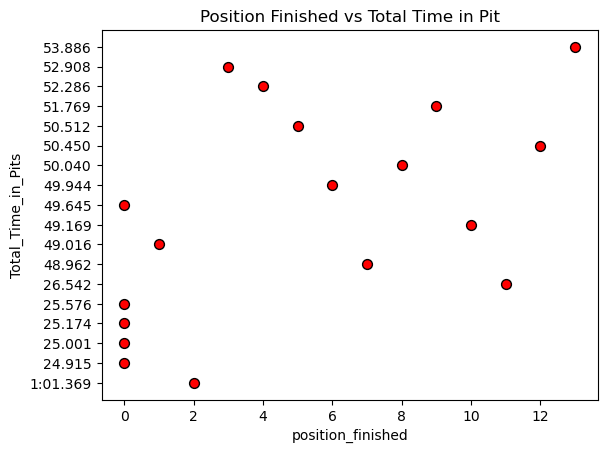

In [54]:
sorted_pit_times.plot.scatter(x ='position_finished', y ='Total_Time_in_Pits',marker="o", color="red", edgecolors="black", s=50)
plt.title('Position Finished vs Total Time in Pit')
plt.show()

In [55]:
race_df['Positions_Gained/Lost'] = race_df['Position_Starting'] - race_df['position_finished']
race_df

,Driver,Driver_ID,Position_Starting,position_finished,Number_of_Stops,Total_Time_in_Pits,Positions_Gained/Lost
1,Valtteri Bottas,5,1,3,2.0,52.908,-2
3,Lewis Hamilton,20,2,2,2.0,1:01.369,0
5,Sebastian Vettel,19,3,1,2.0,49.016,2
7,Daniel Ricciardo,14,4,5,2.0,50.512,-1
9,Kimi Raikkonen,7,5,4,2.0,52.286,1
10,Max Verstappen,25,6,0,1.0,25.174,6
12,Nico Hulkenberg,6,7,9,2.0,51.769,-2
14,Felipe Massa,22,8,6,2.0,49.944,2
16,Romain Grosjean,16,9,8,2.0,50.040,1
18,Jolyon Palmer,32,10,13,2.0,53.886,-3


(-5.0, 8.0)

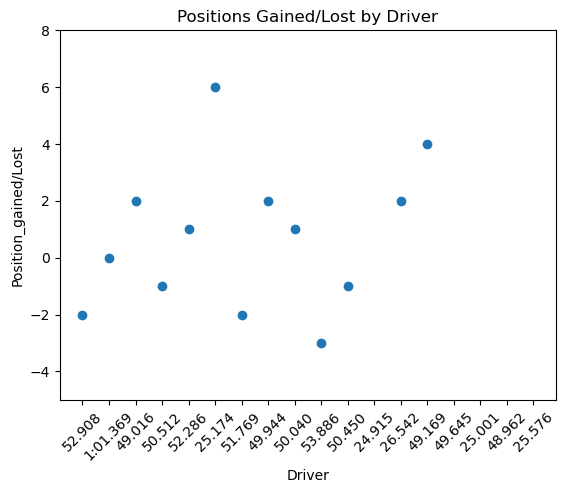

In [59]:
plt.scatter(race_df['Total_Time_in_Pits'], race_df['Positions_Gained/Lost'])
plt.title("Positions Gained/Lost by Driver")
plt.xticks(rotation=45)
plt.ylabel("Position_gained/Lost")
plt.xlabel("Driver")
plt.ylim(-5,8)

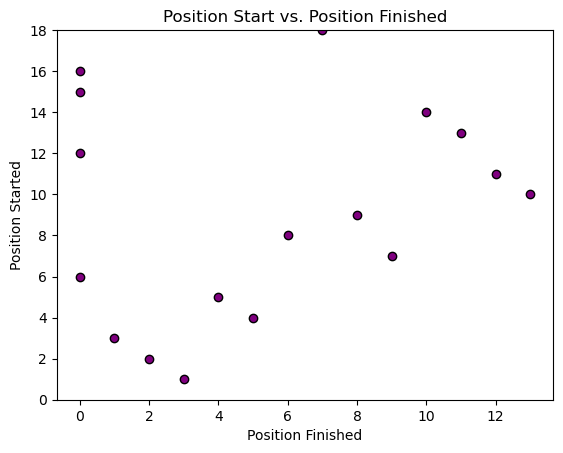

In [63]:
plt.scatter(race_df['position_finished'], race_df['Position_Starting'], marker="o", facecolors="purple", edgecolors="black")
plt.title("Position Start vs. Position Finished")
plt.xlabel("Position Finished")
plt.ylabel("Position Started")
plt.ylim(0,18)
plt.show()